## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

Load the data set

In [3]:
df=pd.read_csv("Credit card transactions - India - Simple.csv")

In [4]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


Checking for NULLS

In [5]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

There are NO NULLS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


all the columns have correct datatype except Date column

Changing the datatype of Date from Object to Datetime 

In [7]:
df["Date"]=pd.to_datetime(df["Date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      26052 non-null  int64         
 1   City       26052 non-null  object        
 2   Date       26052 non-null  datetime64[ns]
 3   Card Type  26052 non-null  object        
 4   Exp Type   26052 non-null  object        
 5   Gender     26052 non-null  object        
 6   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


In [9]:
df.drop("index",axis=1,inplace=True)

In [10]:
df.describe(include="all")

,City,Date,Card Type,Exp Type,Gender,Amount
count,26052,26052,26052,26052,26052,26052.000000
unique,986,600,4,6,2,NaN
top,"Bengaluru, India",2014-09-20 00:00:00,Silver,Food,F,NaN
freq,3552,65,6840,5463,13680,NaN
first,NaN,2013-10-04 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2015-05-26 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,156411.537425
std,NaN,NaN,NaN,NaN,NaN,103063.254287
min,NaN,NaN,NaN,NaN,NaN,1005.000000
25%,NaN,NaN,NaN,NaN,NaN,77120.250000


In [11]:
df["City"]=df["City"].str.replace(", India","")

In [12]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,2014-10-29,Gold,Bills,F,82475
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555
2,Bengaluru,2014-08-27,Silver,Bills,F,101738
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424
4,Bengaluru,2015-05-05,Gold,Bills,F,171574


## EDA

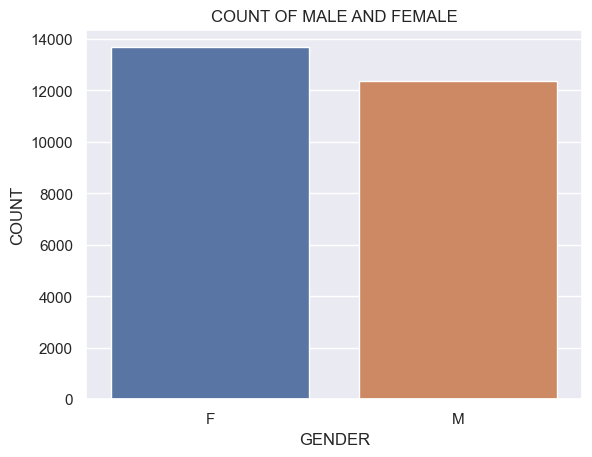

In [13]:
sns.countplot(df["Gender"])
plt.title('COUNT OF MALE AND FEMALE')
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.show()

The female users are more than male users

In [14]:
df["Exp Type"].unique()

array(['Bills', 'Food', 'Entertainment', 'Grocery', 'Fuel', 'Travel'],
      dtype=object)

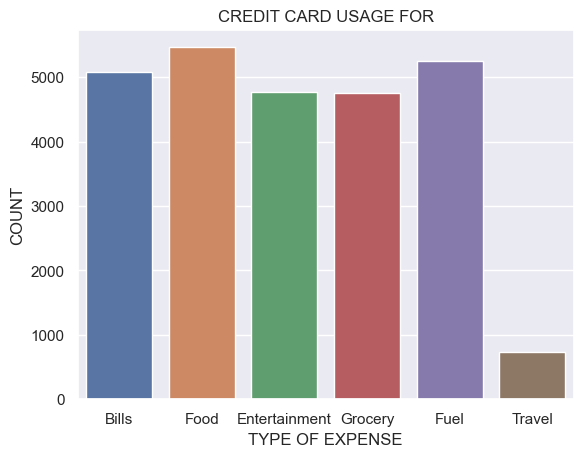

In [15]:
sns.countplot(df["Exp Type"])
plt.title('CREDIT CARD USAGE FOR')
plt.xlabel('TYPE OF EXPENSE')
plt.ylabel('COUNT')
plt.show()

AS WE CAN SEE MOST OF THE EXPENSE IS FOR FOOD FOLLOWED BY BILLS

Various Credit card type

In [16]:
df["Card Type"].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

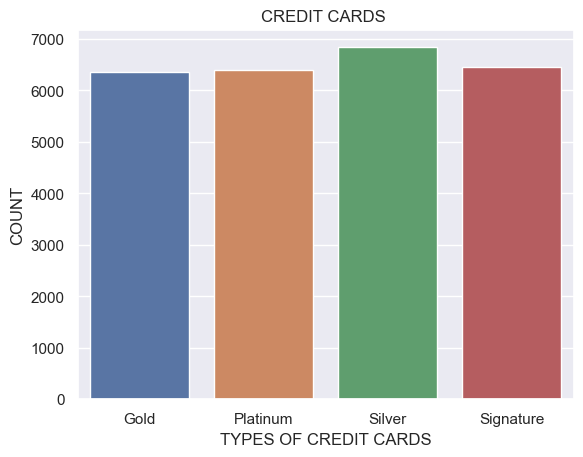

In [37]:
sns.countplot(df["Card Type"])
plt.title('CREDIT CARDS ')
plt.xlabel('TYPES OF CREDIT CARDS')
plt.ylabel('COUNT')
plt.show()

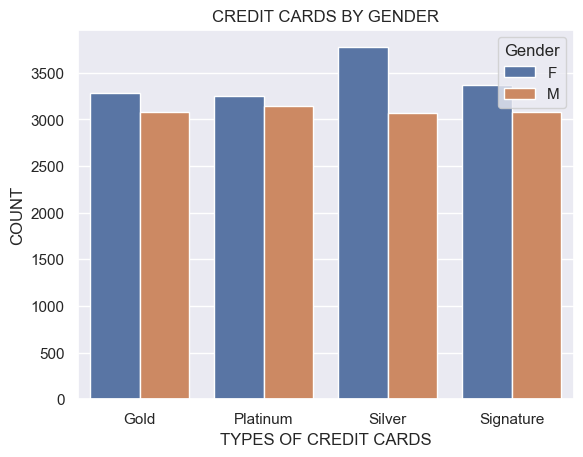

In [18]:
sns.countplot(df["Card Type"],hue=df["Gender"])
plt.title('CREDIT CARDS BY GENDER')
plt.xlabel('TYPES OF CREDIT CARDS')
plt.ylabel('COUNT')
plt.show()

the female users more compred to males users for different type of credit card

Minimum Date in the dataset

In [19]:
df["Date"].min()

Timestamp('2013-10-04 00:00:00')

Maximum Date in the dataset

In [20]:
df["Date"].max()

Timestamp('2015-05-26 00:00:00')

Top 5 cities with most no of uesres

In [21]:
df["City"].value_counts().head(5)

Bengaluru         3552
Greater Mumbai    3493
Ahmedabad         3491
Delhi             3482
Hyderabad          784
Name: City, dtype: int64

In [22]:
df["year"]=df["Date"].dt.year

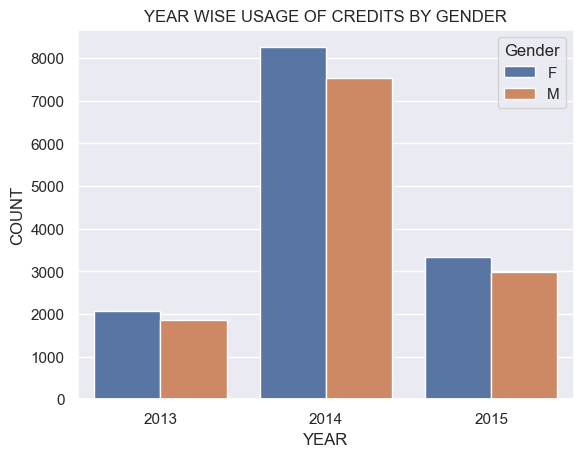

In [23]:
sns.countplot(df["year"],hue=df["Gender"])
plt.title('YEAR WISE USAGE OF CREDITS BY GENDER')
plt.xlabel('YEAR')
plt.ylabel('COUNT')
plt.show()

by these bargraph we can say in 2014 females are more than males but for 2013 and 2015 we dont have full data of every month but by seeing the above conclusion we can say females are more in every year

In [24]:
df_grouped = df.groupby(['year', 'Gender'])['Amount'].sum().reset_index()

In [25]:
df_grouped

,year,Gender,Amount
0,2013,F,333421908
1,2013,M,280221976
2,2014,F,1320262255
3,2014,M,1134451778
4,2015,F,551626867
5,2015,M,454848589


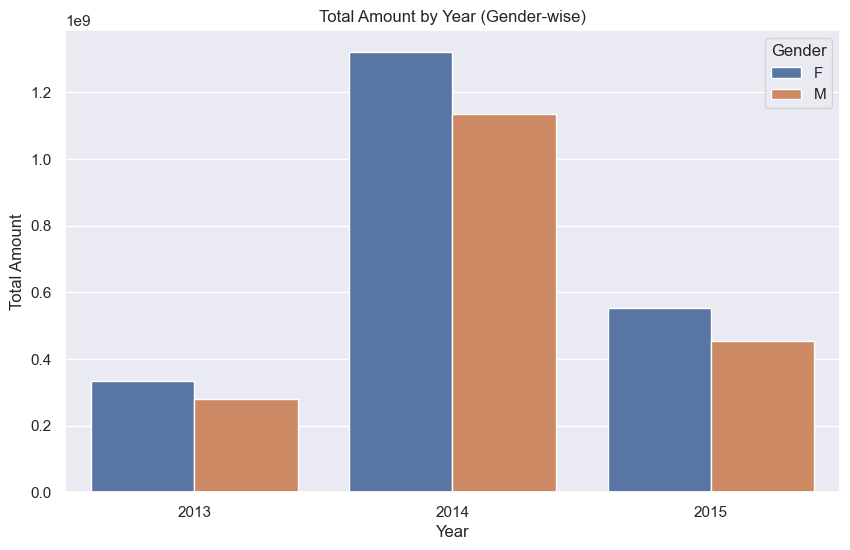

In [26]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
sns.barplot(x='year', y='Amount', hue='Gender', data=df_grouped)
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Total Amount by Year (Gender-wise)')
plt.show()

In [27]:
year_sum=df.groupby("year")["Amount"].sum()

In [28]:
year_sum.values

array([ 613643884, 2454714033, 1006475456], dtype=int64)

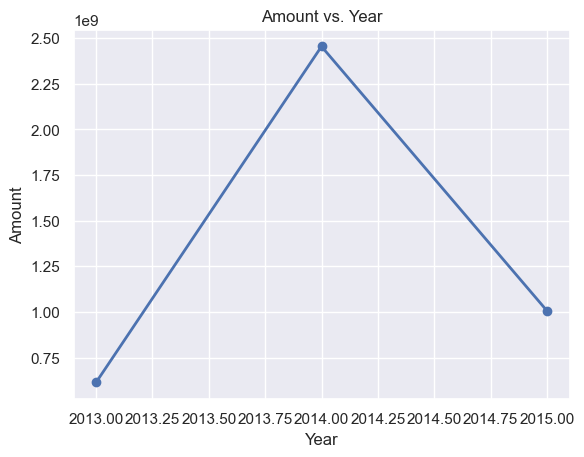

In [29]:
years = year_sum.index
amounts = year_sum.values
plt.plot(years, amounts, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Amount vs. Year')
plt.grid(True)
plt.show()

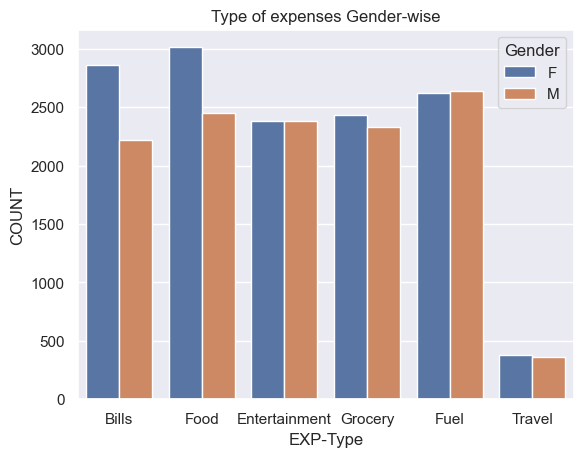

In [30]:
sns.countplot(df["Exp Type"],hue=df["Gender"])
plt.title('Type of expenses Gender-wise')
plt.xlabel('EXP-Type')
plt.ylabel('COUNT')
plt.show()

In Fuel and Entertainment the males and females are equally used credit card

For top 3 cities who uses credit card most

In [31]:
ben=df[df["City"]=="Bengaluru"]

In [32]:
ben.head()

,City,Date,Card Type,Exp Type,Gender,Amount,year
2,Bengaluru,2014-08-27,Silver,Bills,F,101738,2014
4,Bengaluru,2015-05-05,Gold,Bills,F,171574,2015
26,Bengaluru,2014-03-23,Platinum,Bills,F,434427,2014
28,Bengaluru,2015-01-18,Platinum,Bills,F,987935,2015
30,Bengaluru,2014-07-31,Signature,Bills,F,225392,2014


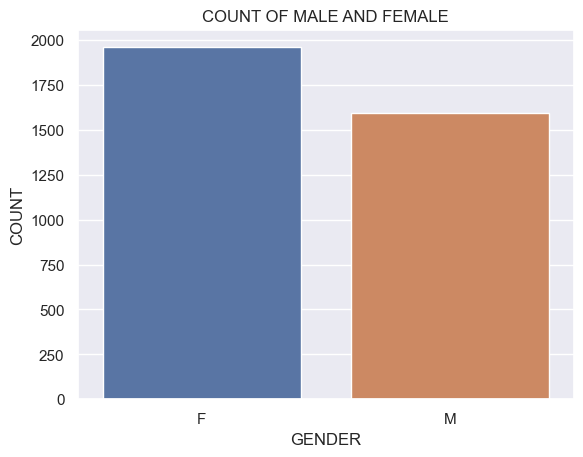

In [33]:
sns.countplot(ben["Gender"])
plt.title('COUNT OF MALE AND FEMALE')
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.show()

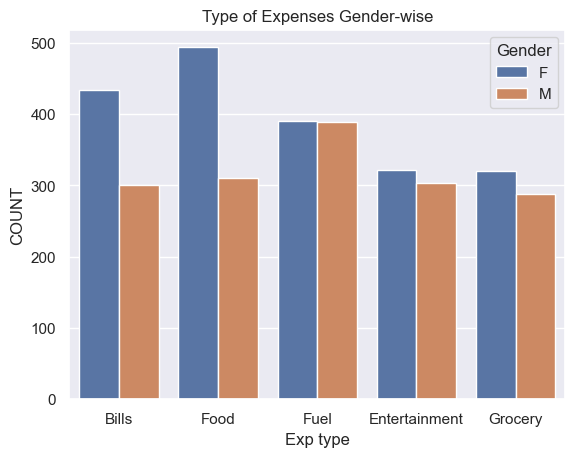

In [35]:
sns.countplot(ben["Exp Type"],hue=ben["Gender"])
plt.title('Type of Expenses Gender-wise')
plt.xlabel('Exp type')
plt.ylabel('COUNT')
plt.show()

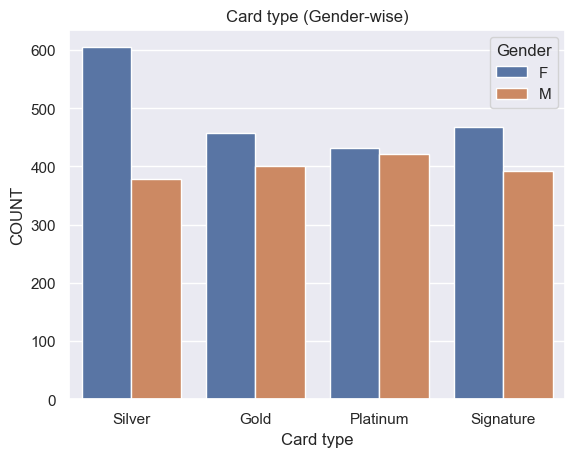

In [36]:
sns.countplot(ben["Card Type"],hue=ben["Gender"])
plt.title('Card type (Gender-wise)')
plt.xlabel('Card type')
plt.ylabel('COUNT')
plt.show()

In [38]:
mum=df[df["City"]=="Greater Mumbai"]

In [39]:
mum.head()

,City,Date,Card Type,Exp Type,Gender,Amount,year
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,2014
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,2014
7,Greater Mumbai,2014-06-26,Platinum,Bills,F,150980,2014
11,Greater Mumbai,2013-12-07,Signature,Bills,F,278036,2013
12,Greater Mumbai,2014-08-07,Gold,Bills,F,19226,2014


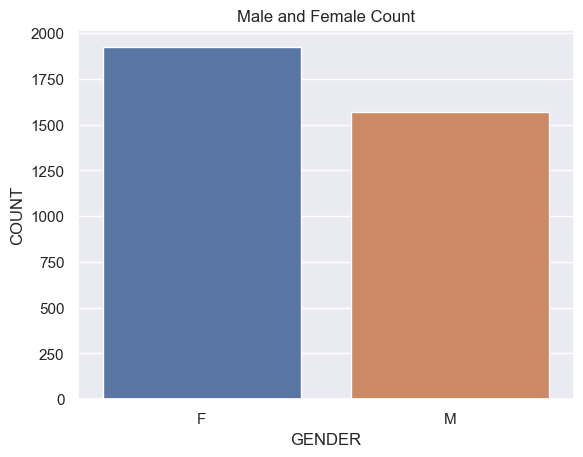

In [41]:
sns.countplot(mum["Gender"])
plt.title('Male and Female Count')
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.show()

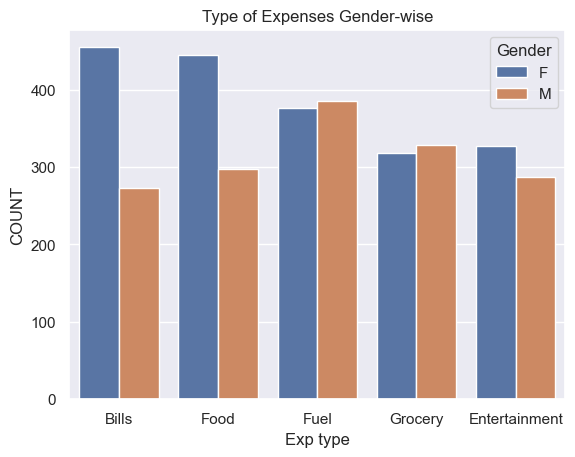

In [42]:
sns.countplot(mum["Exp Type"],hue=mum["Gender"])
plt.title('Type of Expenses Gender-wise')
plt.xlabel('Exp type')
plt.ylabel('COUNT')
plt.show()

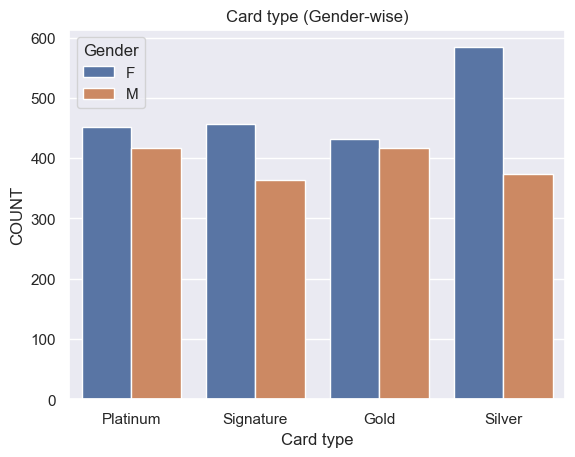

In [43]:
sns.countplot(mum["Card Type"],hue=mum["Gender"])
plt.title('Card type (Gender-wise)')
plt.xlabel('Card type')
plt.ylabel('COUNT')
plt.show()

In [44]:
am=df[df["City"]=="Ahmedabad"]

In [45]:
am.head()

,City,Date,Card Type,Exp Type,Gender,Amount,year
23,Ahmedabad,2013-10-11,Gold,Bills,F,668568,2013
24,Ahmedabad,2014-03-26,Gold,Bills,F,339112,2014
32,Ahmedabad,2013-11-24,Platinum,Bills,F,227702,2013
33,Ahmedabad,2014-11-08,Gold,Bills,F,864090,2014
34,Ahmedabad,2014-09-06,Signature,Bills,F,440605,2014


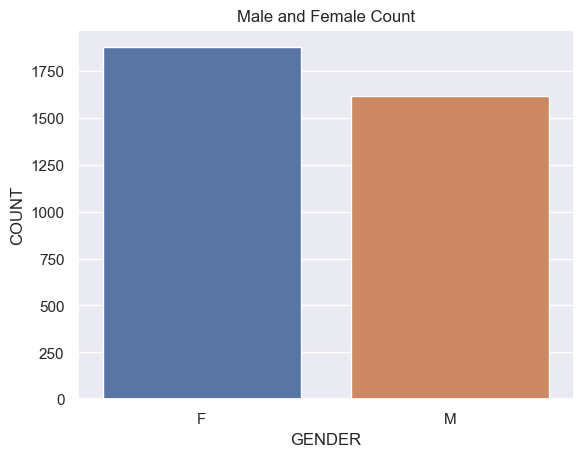

In [49]:
sns.countplot(am["Gender"])
plt.title('Male and Female Count')
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.show()

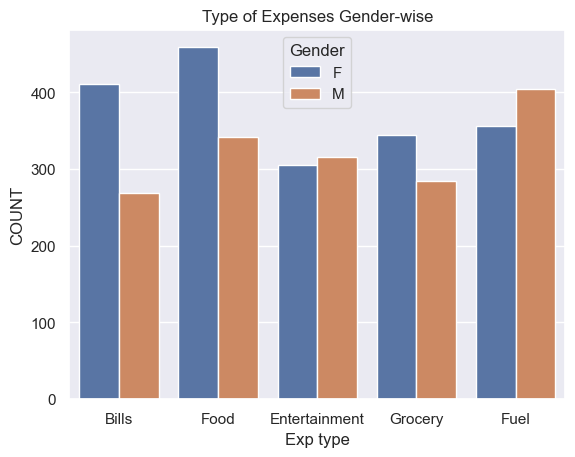

In [50]:
sns.countplot(am["Exp Type"],hue=am["Gender"])
plt.title('Type of Expenses Gender-wise')
plt.xlabel('Exp type')
plt.ylabel('COUNT')
plt.show()

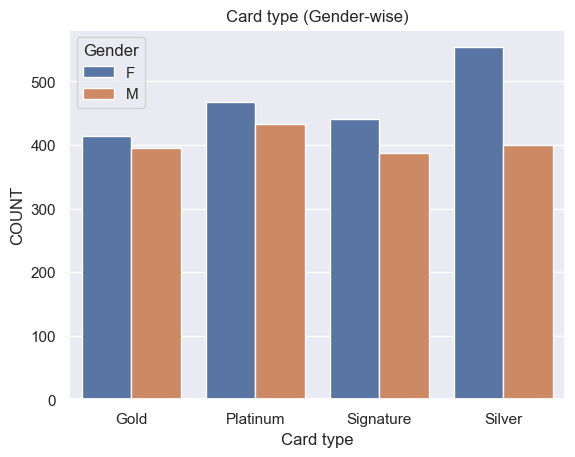

In [51]:
sns.countplot(am["Card Type"],hue=am["Gender"])
plt.title('Card type (Gender-wise)')
plt.xlabel('Card type')
plt.ylabel('COUNT')
plt.show()

Even in top 3 cities the female users are more than male users

In [52]:
df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']

male_yearly_total = df_male.groupby('year')['Amount'].sum()
female_yearly_total = df_female.groupby('year')['Amount'].sum()

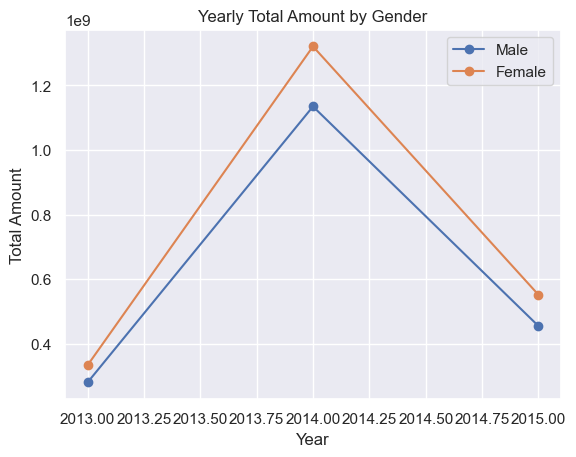

In [53]:
plt.plot(male_yearly_total.index, male_yearly_total.values, marker='o', linestyle='-', label='Male')
plt.plot(female_yearly_total.index, female_yearly_total.values, marker='o', linestyle='-', label='Female')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Yearly Total Amount by Gender')
plt.legend()
plt.grid(True)
plt.show()

The amount made in transaction is more by female than male in every year

In [54]:
gen=df["Gender"].value_counts()

In [55]:
gen

F    13680
M    12372
Name: Gender, dtype: int64

In [56]:
gen['F']=gen['F']/(gen['F']+gen['M'])
gen['M']=gen['M']/(gen['F']+gen['M'])

In [57]:
gen=gen*100

In [61]:
gen

F    52.510364
M    47.489636
Name: Gender, dtype: float64

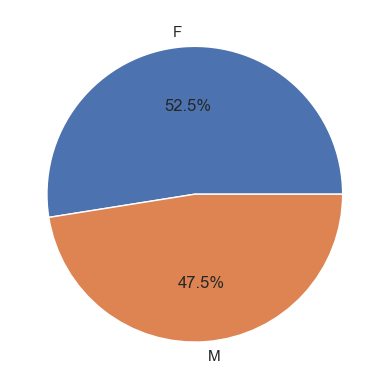

In [62]:
plt.pie(x=gen.values,labels=gen.index, autopct='%1.1f%%')
plt.show()

In [65]:
df.groupby(["Card Type","Gender"])["Amount"].sum()

Card Type  Gender
Gold       F         522932183
           M         461607353
Platinum   F         531940229
           M         475698790
Signature  F         548005149
           M         465035956
Silver     F         602433469
           M         467180244
Name: Amount, dtype: int64

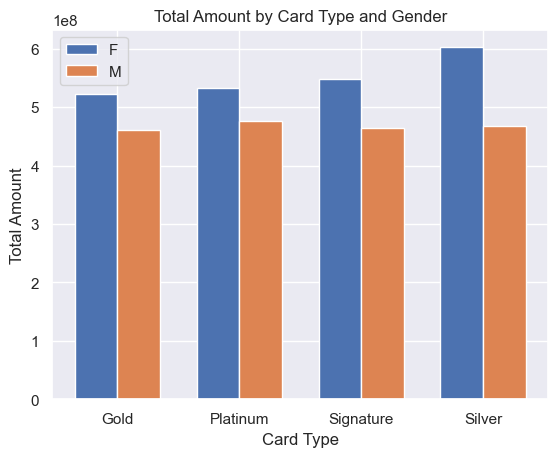

In [66]:
data = {
    ('Gold', 'F'): 522932183,
    ('Gold', 'M'): 461607353,
    ('Platinum', 'F'): 531940229,
    ('Platinum', 'M'): 475698790,
    ('Signature', 'F'): 548005149,
    ('Signature', 'M'): 465035956,
    ('Silver', 'F'): 602433469,
    ('Silver', 'M'): 467180244
}
card_types = sorted(set([card_type for card_type, _ in data.keys()]))
genders = sorted(set([gender for _, gender in data.keys()]))
bar_width = 0.35
x = range(len(card_types))
for i, gender in enumerate(genders):
    amounts = [data[(card_type, gender)] for card_type in card_types]
    plt.bar(x, amounts, width=bar_width, label=gender)
    x = [xi + bar_width for xi in x]
plt.xlabel('Card Type')
plt.ylabel('Total Amount')
plt.title('Total Amount by Card Type and Gender')
plt.xticks([xi + bar_width * (len(genders) - 1) / 2 for xi in range(len(card_types))], card_types)
plt.legend()
plt.show()

In [68]:
car_to=df.groupby("Card Type")["Amount"].sum()

In [69]:
car_to

Card Type
Gold          984539536
Platinum     1007639019
Signature    1013041105
Silver       1069613713
Name: Amount, dtype: int64

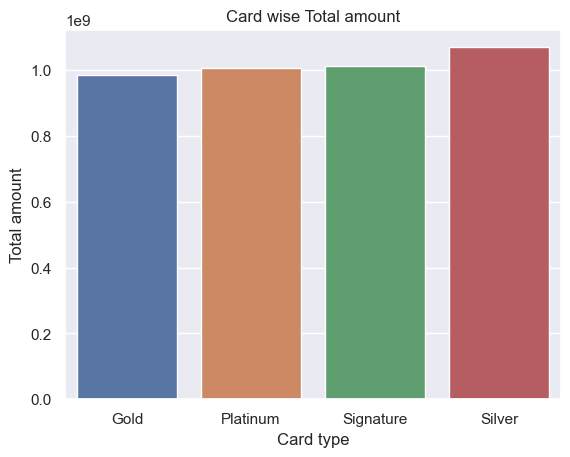

In [71]:
sns.barplot(x=car_to.index,y=car_to.values)
plt.title('Card wise Total amount')
plt.xlabel('Card type')
plt.ylabel('Total amount')
plt.show()

The amount from sliver card is more than other cards

In [72]:
df['y_m'] = df['Date'].dt.to_period('M')

In [73]:
df['y_m']=df['y_m'].astype(str)

In [74]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount,year,y_m
0,Delhi,2014-10-29,Gold,Bills,F,82475,2014,2014-10
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,2014,2014-08
2,Bengaluru,2014-08-27,Silver,Bills,F,101738,2014,2014-08
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,2014,2014-04
4,Bengaluru,2015-05-05,Gold,Bills,F,171574,2015,2015-05


In [75]:
ymonth=df.groupby("y_m")["Amount"].sum()

In [76]:
ymonth.index

Index(['2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05'],
      dtype='object', name='y_m')

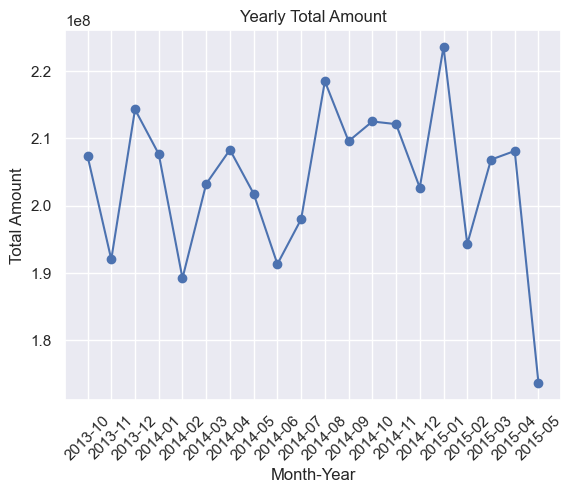

In [79]:
plt.plot(ymonth.index, ymonth.values, marker='o', linestyle='-')
plt.xlabel('Month-Year')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.title('Yearly Total Amount')
plt.show()

In [80]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount,year,y_m
0,Delhi,2014-10-29,Gold,Bills,F,82475,2014,2014-10
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,2014,2014-08
2,Bengaluru,2014-08-27,Silver,Bills,F,101738,2014,2014-08
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,2014,2014-04
4,Bengaluru,2015-05-05,Gold,Bills,F,171574,2015,2015-05


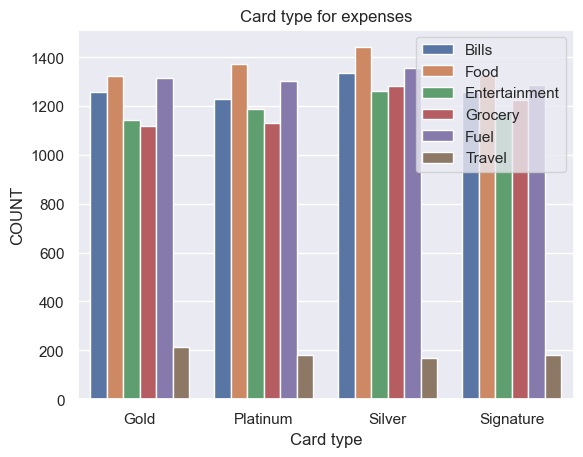

In [82]:
sns.countplot(df["Card Type"],hue=df["Exp Type"])
plt.title('Card type for expenses')
plt.xlabel('Card type')
plt.ylabel('COUNT')
plt.legend()
plt.show()

All cards are more used for food

In [83]:
ep=df.groupby(["Exp Type","year"])["Amount"].sum().unstack()

In [84]:
ep

year,2013,2014,2015
Exp Type,,,
Bills,136165014,543741413,227166046
Entertainment,113094669,443730570,169612297
Food,123284967,491383057,210055985
Fuel,113938738,481697184,193499899
Grocery,111806890,428628961,177772072
Travel,15353606,65532848,28369157


In [85]:
ep.loc["Entertainment"].values

array([113094669, 443730570, 169612297], dtype=int64)

In [86]:
d = {
    'year': ep.columns,
    'Bills':ep.loc["Bills"].values,
    'Entertainment':ep.loc["Entertainment"].values ,
    'Food':ep.loc["Food"].values,
    'Fuel':ep.loc["Fuel"].values ,
    'Grocery':ep.loc["Grocery"].values ,
    'Travel': ep.loc["Travel"].values
}

In [87]:
exp=pd.DataFrame(d)
exp.set_index('year', inplace=True)

In [88]:
exp

,Bills,Entertainment,Food,Fuel,Grocery,Travel
year,,,,,,
2013,136165014,113094669,123284967,113938738,111806890,15353606
2014,543741413,443730570,491383057,481697184,428628961,65532848
2015,227166046,169612297,210055985,193499899,177772072,28369157


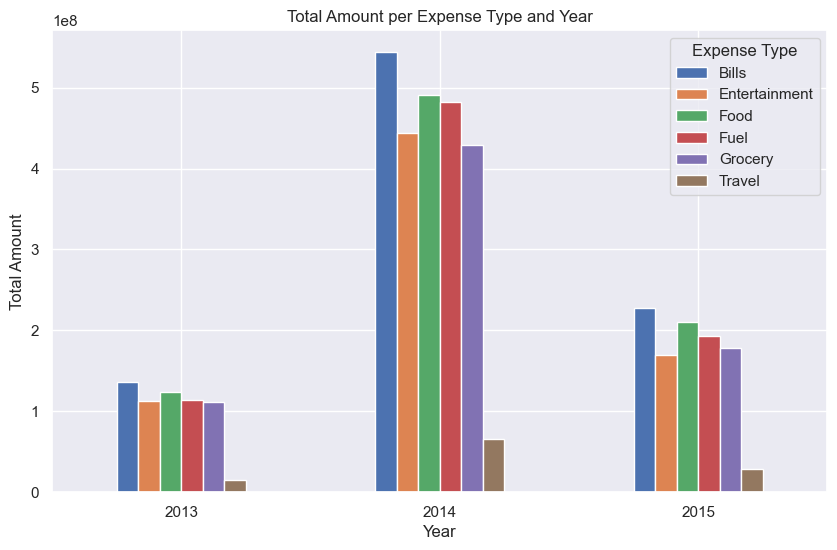

In [89]:
exp.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Total Amount per Expense Type and Year')
plt.xticks(rotation=0)
plt.legend(title='Expense Type')
plt.show()

Bills make more amount in every year

In [90]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount,year,y_m
0,Delhi,2014-10-29,Gold,Bills,F,82475,2014,2014-10
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555,2014,2014-08
2,Bengaluru,2014-08-27,Silver,Bills,F,101738,2014,2014-08
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424,2014,2014-04
4,Bengaluru,2015-05-05,Gold,Bills,F,171574,2015,2015-05


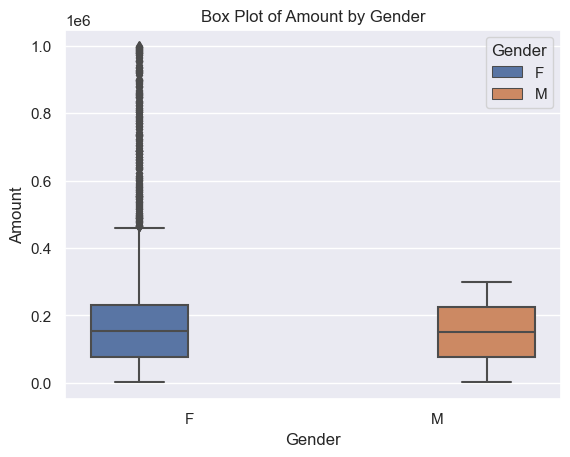

In [91]:
sns.boxplot(x="Gender", y="Amount", data=df, hue="Gender")
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Gender')
plt.show()

Males amount spent is with in IQR range
but females spent more than IQR range

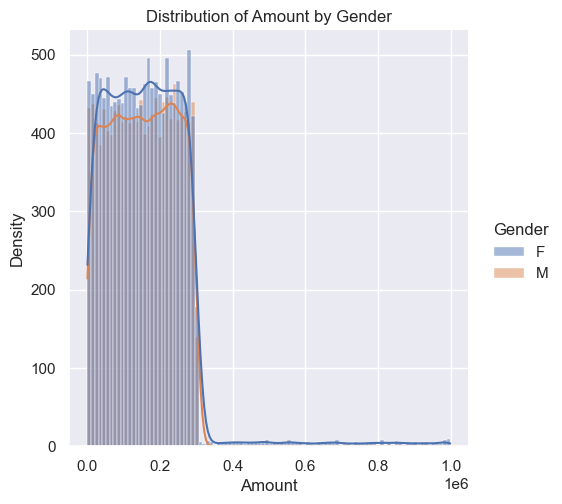

In [92]:
sns.displot(data=df, x="Amount", hue="Gender", kde=True)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution of Amount by Gender')
plt.show()

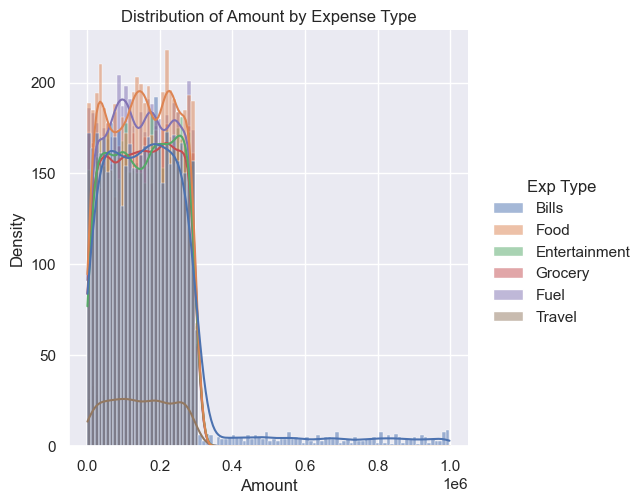

In [93]:
sns.displot(data=df, x="Amount", hue="Exp Type", kde=True)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution of Amount by Expense Type')
plt.show()

In [94]:
avg_gen=df.groupby(["year","Gender","Exp Type","Card Type"])["Amount"].mean()

In [95]:
avg_gen.unstack()

Card Type                           Gold       Platinum      Signature  \
year Gender Exp Type                                                     
2013 F      Bills          214629.760000  217851.617886  232571.872727   
            Entertainment  153572.842697  155875.134831  171795.719101   
            Food           138534.398374  160176.710526  153053.268519   
            Fuel           151897.609524  146425.063291  148932.504950   
            Grocery        152049.253012  135408.078947  151085.548077   
            Travel         100971.818182  161487.750000  143505.826087   
     M      Bills          136183.638554  146827.250000  145406.851351   
            Entertainment  147987.654762  163196.201923  143021.541176   
            Food           135993.587500  156237.795699  165561.210526   
            Fuel           150036.590909  151344.440000  147761.723404   
            Grocery        148095.329545  150179.571429  154007.639175   
            Travel         226726.333333  127185.461538  143331.750000   
2014 F      Bills          201689.862319  208553.698454  201624.025822   
            Entertainment  142264.670300  153462.823188  146068.437326   
            Food           149216.161137  151231.847575  155896.343529   
            Fuel           143785.658416  147416.824147  143363.521519   
            Grocery        147769.000000  150198.127976  153772.806878   
            Travel         148216.967213  127676.490566  157480.086207   
     M      Bills          147228.839650  143257.125000  144510.578171   
            Entertainment  160531.005714  157151.471545  156067.561828   
            Food           150806.437995  151583.273210  151532.457064   
            Fuel           148492.252427  148390.486175  146683.300000   
            Grocery        149422.988235  151547.067416  153246.849858   
            Travel         153256.000000  126856.888889  143108.350877   
2015 F      Bills          213342.232044  199805.146893  202918.012270   
            Entertainment  155235.866667  160603.962687  155301.808511   
            Food           138533.747191  154140.827225  154058.323699   
            Fuel           151165.756757  151496.425806  146028.263514   
            Grocery        149223.322581  161331.340580  147238.493333   
            Travel         139345.000000  156994.857143  161694.823529   
     M      Bills          149286.600000  152724.123967  148407.496599   
            Entertainment  152964.112782  152801.013699  151686.080645   
            Food           150381.207143  156180.171779  157955.047904   
            Fuel           149055.107595  152405.947712  148045.544944   
            Grocery        146292.240506  155526.214286  153328.478873   
            Travel         130915.965517  135398.535714  233157.625000   

Card Type                         Silver  
year Gender Exp Type                      
2013 F      Bills          138193.386139  
            Entertainment  142034.267327  
            Food           139928.378151  
            Fuel           152868.900990  
            Grocery        146060.825243  
            Travel         129951.800000  
     M      Bills          145510.552083  
            Entertainment  156068.695652  
            Food           145382.382979  
            Fuel           163246.440476  
            Grocery        168773.192308  
            Travel         152556.571429  
2014 F      Bills          192510.234343  
            Entertainment  150418.450382  
            Food           146783.038462  
            Fuel           158870.235149  
            Grocery        148729.641686  
            Travel         138179.020833  
     M      Bills          150344.053571  
            Entertainment  146106.304000  
            Food           146272.279202  
            Fuel           159752.875598  
            Grocery        149562.864048  
            Travel         158817.396552  
2015 F      Bills          217458.109890  
            Entertainment 